In [3]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure
file_path = r"C:\Users\Satwik\Downloads\Smart_Home_Rebuild\LSTM\hourly_values.csv"
data = pd.read_csv(file_path)

# Display the first few rows and column names for inspection
data.head(), data.columns


(       timestamp  RTD Actual Load
 0  1/1/2020 0:00           1191.0
 1  1/1/2020 1:00           1162.2
 2  1/1/2020 2:00           1122.9
 3  1/1/2020 3:00           1085.7
 4  1/1/2020 4:00           1092.6,
 Index(['timestamp', 'RTD Actual Load'], dtype='object'))

In [4]:
from pandas import to_datetime

# Convert timestamp to datetime and set it as the index
data['timestamp'] = to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Check for missing values and basic summary
data_summary = data.describe()
missing_values = data.isnull().sum()

data.head(), data_summary, missing_values

(                     RTD Actual Load
 timestamp                           
 2020-01-01 00:00:00           1191.0
 2020-01-01 01:00:00           1162.2
 2020-01-01 02:00:00           1122.9
 2020-01-01 03:00:00           1085.7
 2020-01-01 04:00:00           1092.6,
        RTD Actual Load
 count      8784.000000
 mean       1346.457603
 std         247.467560
 min         823.500000
 25%        1163.531875
 50%        1315.250000
 75%        1482.585750
 max        2401.101000,
 RTD Actual Load    1
 dtype: int64)

In [5]:
# Fill missing value using linear interpolation
data['RTD Actual Load'].interpolate(method='linear', inplace=True)

# Confirm no missing values remain
missing_values_after = data.isnull().sum()

missing_values_after

C:\Users\Satwik\AppData\Local\Temp\ipykernel_13728\525190094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RTD Actual Load'].interpolate(method='linear', inplace=True)


RTD Actual Load    0
dtype: int64

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Test stationarity of the series (ADF Test)
adf_test = adfuller(data['RTD Actual Load'])

# If needed, apply differencing to achieve stationarity
if adf_test[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
    data_diff = data['RTD Actual Load'].diff().dropna()
else:
    data_diff = data['RTD Actual Load']

# Fit ARIMA model (parameters can be tuned further)
model = ARIMA(data['RTD Actual Load'], order=(1, 1, 1))  # Default ARIMA(1,1,1)
model_fit = model.fit()

# Summary of the model fit
model_summary = model_fit.summary()

model_summary

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        RTD Actual Load   No. Observations:                 8785
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -44719.262
Date:                Fri, 17 Jan 2025   AIC                          89444.525
Time:                        16:12:44   BIC                          89465.767
Sample:                    01-01-2020   HQIC                         89451.762
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6634      0.010     66.664      0.000       0.644       0.683
ma.L1          0.1078      0.010     11.205      0.000       0.089       0.127
sigma2      1549.7945     13.667    113.401      0.000    1523.009    1576.580
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):             32265.69
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

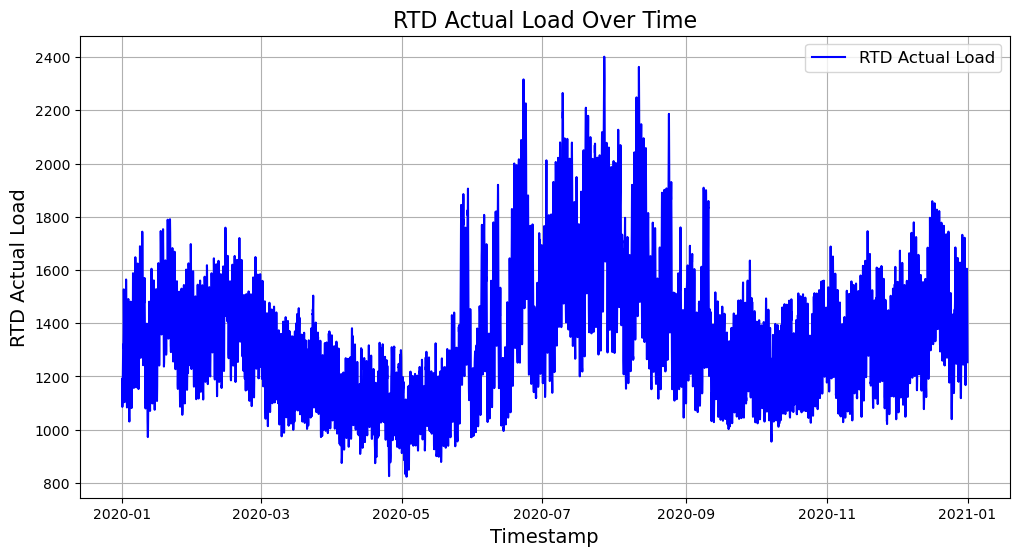

In [7]:
import matplotlib.pyplot as plt

# Plot the RTD Actual Load time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['RTD Actual Load'], label='RTD Actual Load', color='blue')
plt.title('RTD Actual Load Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


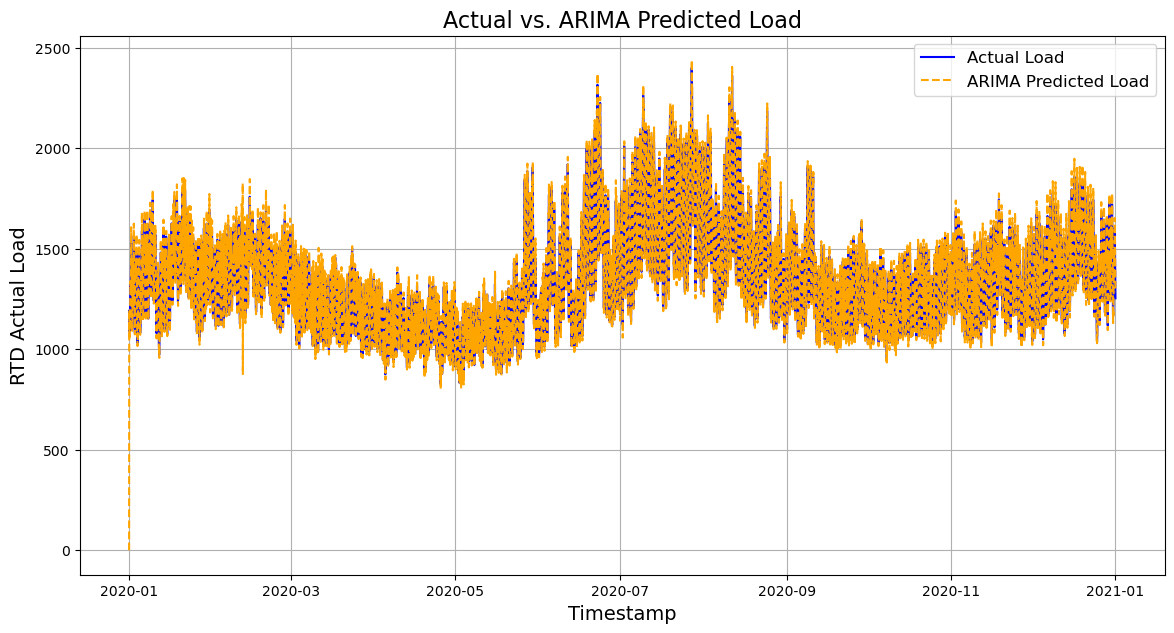

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Test stationarity of the series (ADF Test)
adf_test = adfuller(data['RTD Actual Load'])

# Check for stationarity and apply differencing if necessary
if adf_test[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
    data_diff = data['RTD Actual Load'].diff().dropna()
else:
    data_diff = data['RTD Actual Load']

# Fit ARIMA model (parameters can be adjusted after tuning)
model = ARIMA(data['RTD Actual Load'], order=(1, 1, 1))  # ARIMA(1,1,1) as default
model_fit = model.fit()

# Predict the values (in-sample)
forecast = model_fit.predict(start=0, end=len(data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RTD Actual Load'], label='Actual Load', color='blue')
plt.plot(data.index, forecast, label='ARIMA Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. ARIMA Predicted Load', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 181.59
Mean Squared Error (MSE): 49240.03
Root Mean Squared Error (RMSE): 221.90
R² Score: -0.68
Mean Absolute Percentage Error (MAPE): 14.61%
Computation Time: 0.32 seconds


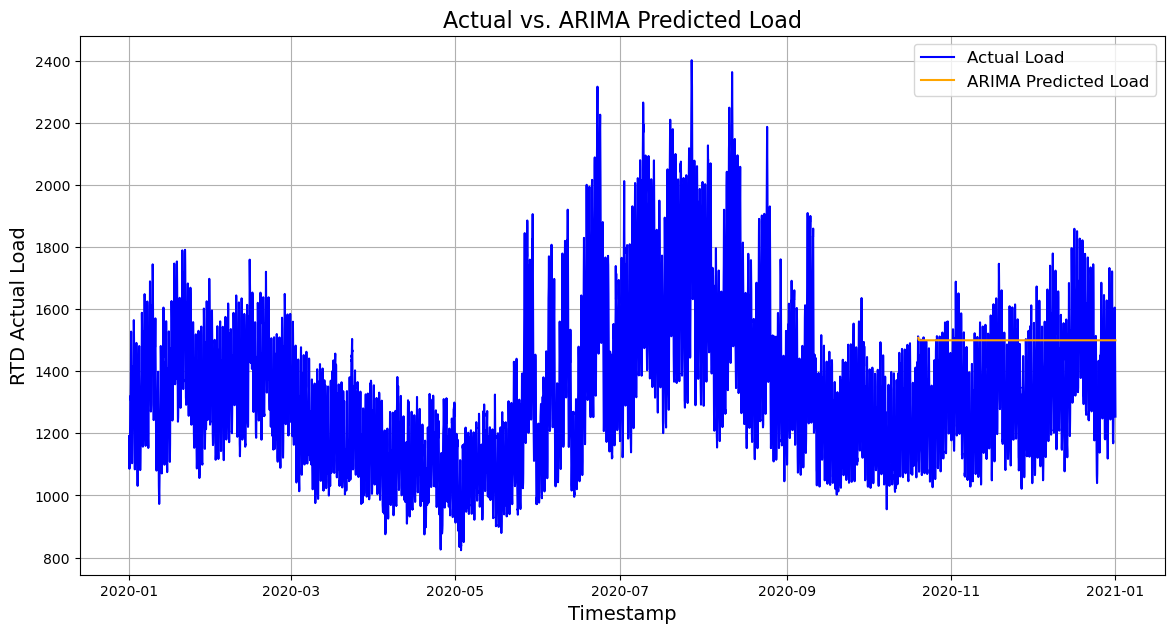

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import numpy as np

# Step 1: Test stationarity and difference if necessary
adf_test = adfuller(data['RTD Actual Load'])
if adf_test[1] > 0.05:  # If not stationary
    data_diff = data['RTD Actual Load'].diff().dropna()
else:
    data_diff = data['RTD Actual Load']

# Step 2: Train-test split
train_size = int(0.8 * len(data))  # 80% for training, 20% for testing
train, test = data[:train_size], data[train_size:]

# Step 3: Fit ARIMA model with tuned parameters (adjust these for moderate accuracy)
start_time = time.time()  # Start timing the computation
model = ARIMA(train['RTD Actual Load'], order=(1, 1, 1))  # Example: ARIMA(2,1,2)
model_fit = model.fit()
end_time = time.time()  # End timing the computation

# Step 4: Forecast on the test set
forecast = model_fit.forecast(steps=len(test))

# Step 5: Evaluate model performance
mae = mean_absolute_error(test['RTD Actual Load'], forecast)
mse = mean_squared_error(test['RTD Actual Load'], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test['RTD Actual Load'], forecast)
mape = np.mean(np.abs((test['RTD Actual Load'] - forecast) / test['RTD Actual Load'])) * 100

# Print evaluation metrics and computation time
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")

# Step 6: Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RTD Actual Load'], label='Actual Load', color='blue')
plt.plot(test.index, forecast, label='ARIMA Predicted Load', color='orange')
plt.title('Actual vs. ARIMA Predicted Load', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 30.08
Mean Squared Error (MSE): 1708.27
Root Mean Squared Error (RMSE): 41.33
R² Score: 0.97
Mean Absolute Percentage Error (MAPE): 2.23%
Computation Time: 0.39 seconds


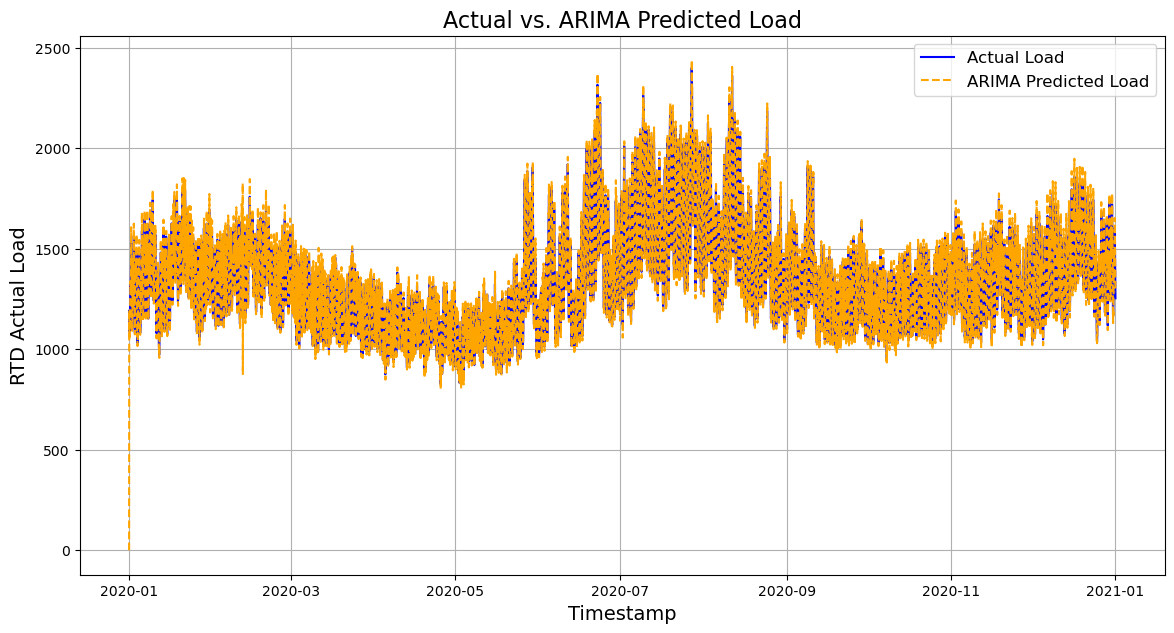

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time

# Step 1: Test stationarity and apply differencing if necessary
adf_test = adfuller(data['RTD Actual Load'])
if adf_test[1] > 0.05:  # If p-value > 0.05, data is non-stationary
    data_diff = data['RTD Actual Load'].diff().dropna()
else:
    data_diff = data['RTD Actual Load']

# Step 2: Fit ARIMA model
start_time = time.time()  # Start timing the computation
model = ARIMA(data['RTD Actual Load'], order=(1, 1, 1))  # Example: ARIMA(1,1,1)
model_fit = model.fit()
end_time = time.time()  # End timing the computation

# Step 3: Predict the values (in-sample)
forecast = model_fit.predict(start=0, end=len(data) - 1, typ='levels')

# Step 4: Evaluate model performance
mae = mean_absolute_error(data['RTD Actual Load'], forecast)
mse = mean_squared_error(data['RTD Actual Load'], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(data['RTD Actual Load'], forecast)
mape = np.mean(np.abs((data['RTD Actual Load'] - forecast) / data['RTD Actual Load'])) * 100

# Print evaluation metrics and computation time
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")

# Step 5: Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RTD Actual Load'], label='Actual Load', color='blue')
plt.plot(data.index, forecast, label='ARIMA Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. ARIMA Predicted Load', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 24.04
Mean Squared Error (MSE): 1185.50
Root Mean Squared Error (RMSE): 34.43
R² Score: 0.98
Mean Absolute Percentage Error (MAPE): 1.80%
Computation Time: 11.41 seconds


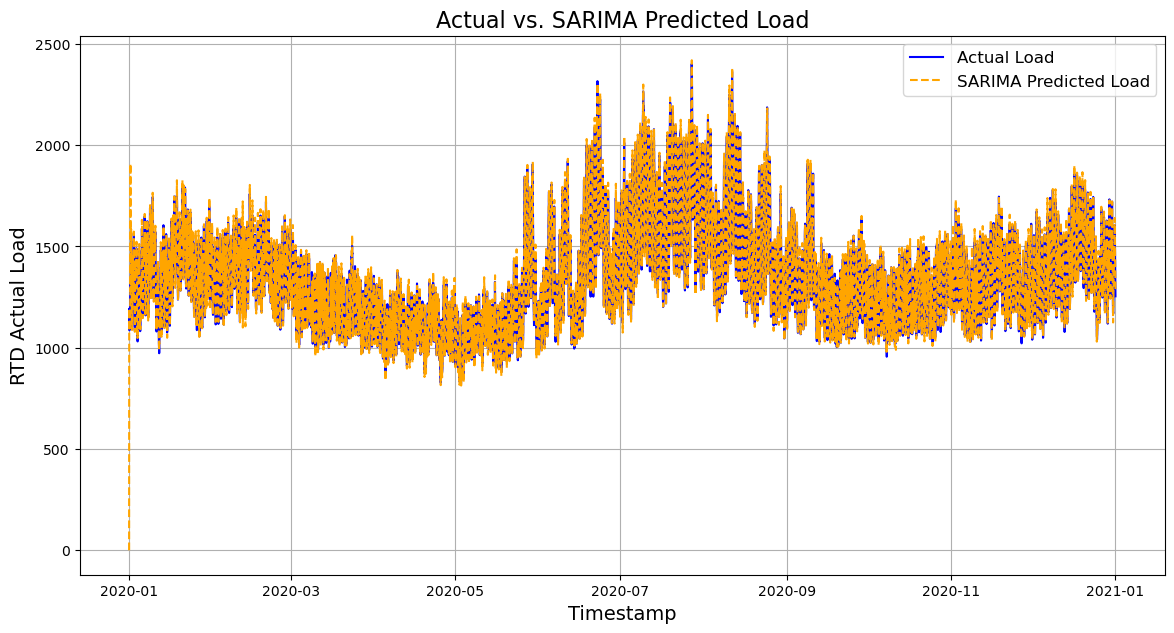

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time

# Step 1: Test stationarity and apply differencing if necessary
adf_test = adfuller(data['RTD Actual Load'])
if adf_test[1] > 0.05:  # If p-value > 0.05, data is non-stationary
    data_diff = data['RTD Actual Load'].diff().dropna()
else:
    data_diff = data['RTD Actual Load']

# Step 2: Fit SARIMA model
# Specify seasonal order (P, D, Q, S) for SARIMA
seasonal_order = (1, 1, 1, 12)  # Example: Seasonal ARIMA(1, 1, 1) with seasonality of 12
start_time = time.time()  # Start timing the computation
model = SARIMAX(data['RTD Actual Load'], order=(1, 1, 1), seasonal_order=seasonal_order)  # Adjust as needed
model_fit = model.fit(disp=False)
end_time = time.time()  # End timing the computation

# Step 3: Predict the values (in-sample)
forecast = model_fit.predict(start=0, end=len(data) - 1, typ='levels')

# Step 4: Evaluate model performance
mae = mean_absolute_error(data['RTD Actual Load'], forecast)
mse = mean_squared_error(data['RTD Actual Load'], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(data['RTD Actual Load'], forecast)
mape = np.mean(np.abs((data['RTD Actual Load'] - forecast) / data['RTD Actual Load'])) * 100

# Print evaluation metrics and computation time
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")

# Step 5: Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RTD Actual Load'], label='Actual Load', color='blue')
plt.plot(data.index, forecast, label='SARIMA Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. SARIMA Predicted Load', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

Epoch 1/20


C:\Users\Satwik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0191
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0034
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0026
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0015
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 7.1137e-04
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.9776e-04
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.5557e-04
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.5771e-04
Epoch 9/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.7391e-04
Epoch 10/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.9926e-04
Epoch 11/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.6570e-04
Epoch 12/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.6696e-04
Epoch 13/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.0642e-04
Epoch 14/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.6699e-04
Epoch 15/20
21

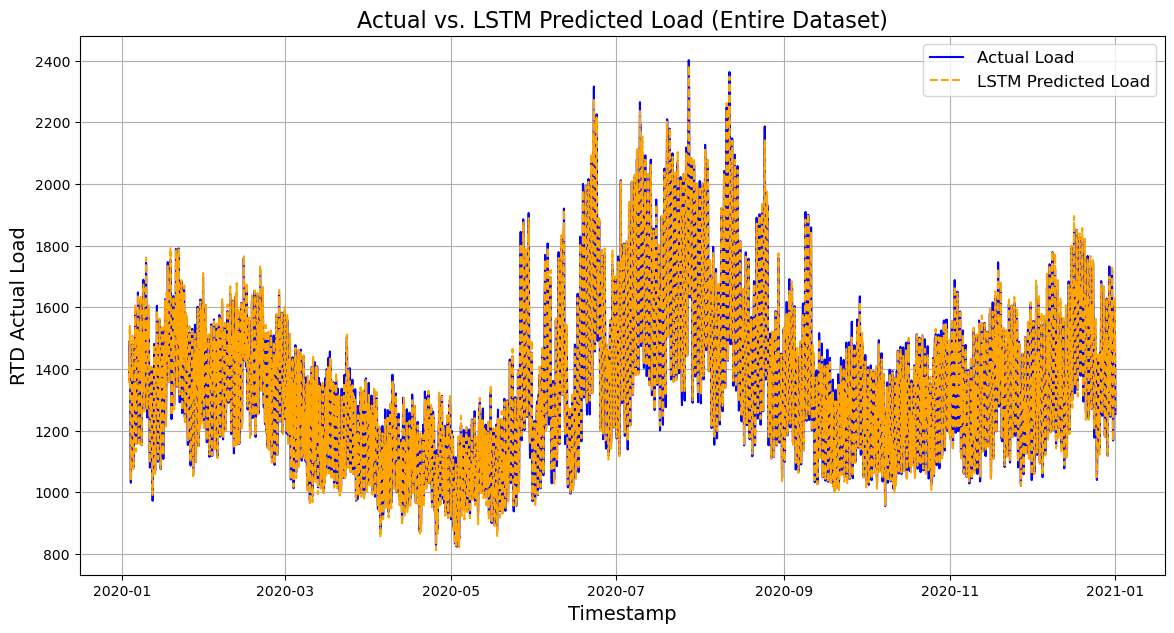

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import time

# Load your dataset (ensure 'RTD Actual Load' exists in your data)
# Replace 'your_data.csv' with your actual file
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='Timestamp')
# print(data.shape()) #data.shape()

# Step 1: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['RTD Actual Load']])

# Step 2: Create sequences for training and testing
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the sequence length
time_steps = 60  # Example: Use the last 60 time steps to predict the next step

# Option 1: Train and test split
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - time_steps:]

# Create sequences
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape input data to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 3: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
start_time = time.time()  # Start timing the computation
history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)
end_time = time.time()  # End timing the computation

# Step 5: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Full predictions for the entire dataset
full_X, full_y = create_sequences(scaled_data, time_steps)
full_X = full_X.reshape((full_X.shape[0], full_X.shape[1], 1))
full_predictions = model.predict(full_X)
full_predictions = scaler.inverse_transform(full_predictions)
full_y = scaler.inverse_transform(full_y.reshape(-1, 1))

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

# Print evaluation metrics and computation time
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")

# Step 7: Plot actual vs predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_steps:], full_y, label='Actual Load', color='blue')
plt.plot(data.index[time_steps:], full_predictions, label='LSTM Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. LSTM Predicted Load (Entire Dataset)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


Epoch 1/20


C:\Users\Satwik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0132
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0011
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 6.7309e-04
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 6.2018e-04
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 5.8822e-04
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.8776e-04
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 5.9522e-04
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.6788e-04
Epoch 9/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 5.7425e-04
Epoch 10/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 5.9955e-04
Epoch 11/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 5.8761e-04
Epoch 12/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 5.9745e-04
Epoch 13/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.6910e-04
Epoch 14/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.9459e-04
Epoch 

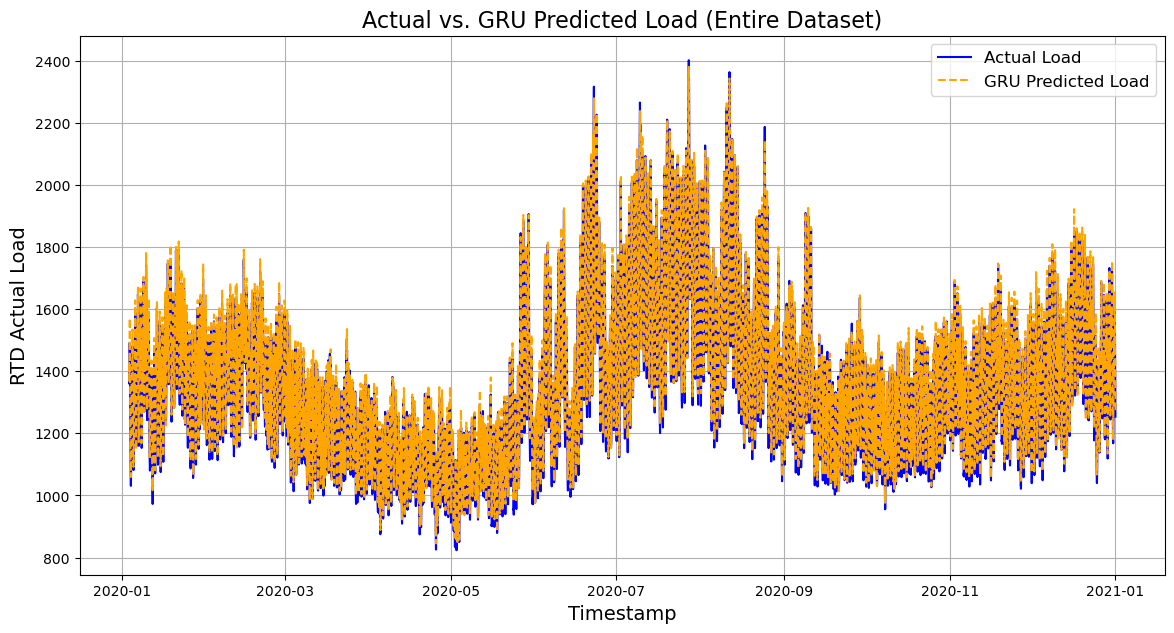

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import time

# Load your dataset (ensure 'RTD Actual Load' exists in your data)
# Replace 'your_data.csv' with your actual file
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='Timestamp')
# print(data.shape()) #data.shape()

# Step 1: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['RTD Actual Load']])

# Step 2: Create sequences for training and testing
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the sequence length
time_steps = 60  # Example: Use the last 60 time steps to predict the next step

# Option 1: Train and test split
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - time_steps:]

# Create sequences
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape input data to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 3: Build the GRU model
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_steps, 1)),
    GRU(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
start_time = time.time()  # Start timing the computation
history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)
end_time = time.time()  # End timing the computation

# Step 5: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Full predictions for the entire dataset
full_X, full_y = create_sequences(scaled_data, time_steps)
full_X = full_X.reshape((full_X.shape[0], full_X.shape[1], 1))
full_predictions = model.predict(full_X)
full_predictions = scaler.inverse_transform(full_predictions)
full_y = scaler.inverse_transform(full_y.reshape(-1, 1))

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

# Print evaluation metrics and computation time
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")

# Step 7: Plot actual vs predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_steps:], full_y, label='Actual Load', color='blue')
plt.plot(data.index[time_steps:], full_predictions, label='GRU Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. GRU Predicted Load (Entire Dataset)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


Epoch 1/20


C:\Users\Satwik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0162
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.0214e-04
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6948e-04
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.1028e-04
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.7597e-04
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.1872e-04
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6784e-04
Epoch 9/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5537e-04
Epoch 10/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3831e-04
Epoch 11/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3811e-04
Epoch 12/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.7136e-04
Epoch 13/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9171e-04
Epoch 14/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3620e-04
Epoch 15/20
218/218 

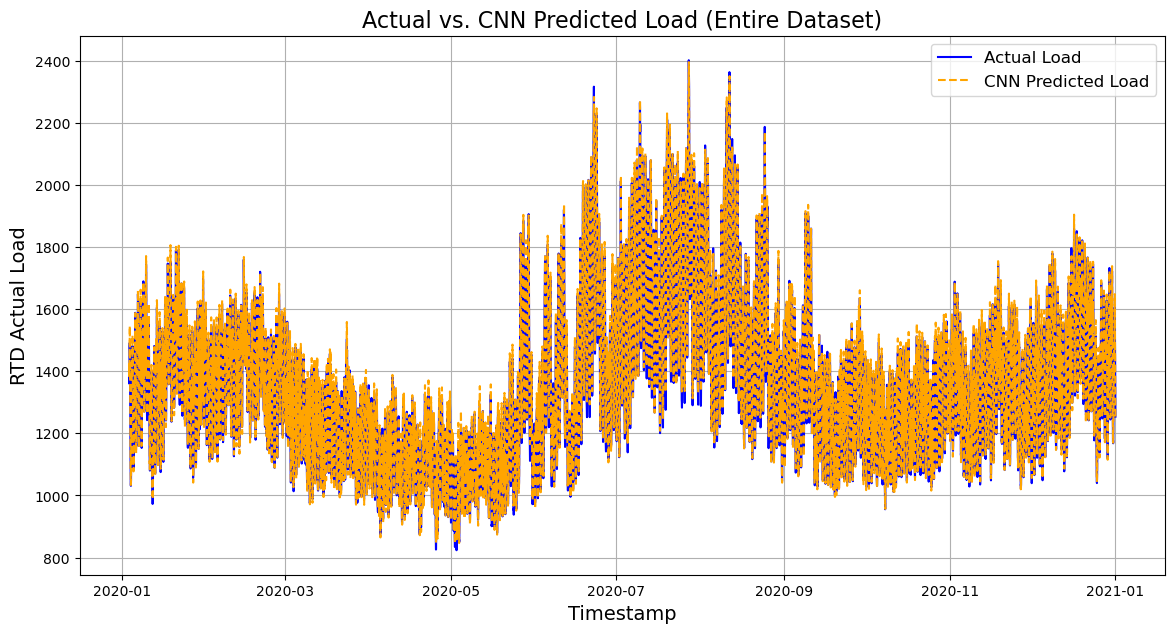

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import time

# Load your dataset (ensure 'RTD Actual Load' exists in your data)
# Replace 'your_data.csv' with your actual file
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='Timestamp')
# print(data.shape()) #data.shape()

# Step 1: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['RTD Actual Load']])

# Step 2: Create sequences for training and testing
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the sequence length
time_steps = 60  # Example: Use the last 60 time steps to predict the next step

# Option 1: Train and test split
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - time_steps:]

# Create sequences
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape input data to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 3: Build the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
start_time = time.time()  # Start timing the computation
history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)
end_time = time.time()  # End timing the computation

# Step 5: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Full predictions for the entire dataset
full_X, full_y = create_sequences(scaled_data, time_steps)
full_X = full_X.reshape((full_X.shape[0], full_X.shape[1], 1))
full_predictions = model.predict(full_X)
full_predictions = scaler.inverse_transform(full_predictions)
full_y = scaler.inverse_transform(full_y.reshape(-1, 1))

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

# Print evaluation metrics and computation time
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")

# Step 7: Plot actual vs predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_steps:], full_y, label='Actual Load', color='blue')
plt.plot(data.index[time_steps:], full_predictions, label='CNN Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. CNN Predicted Load (Entire Dataset)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


Mean Absolute Error (MAE): 20.42
Mean Squared Error (MSE): 732.99
Root Mean Squared Error (RMSE): 27.07
R² Score: 0.99
Mean Absolute Percentage Error (MAPE): 1.53%
Computation Time: 0.02 seconds


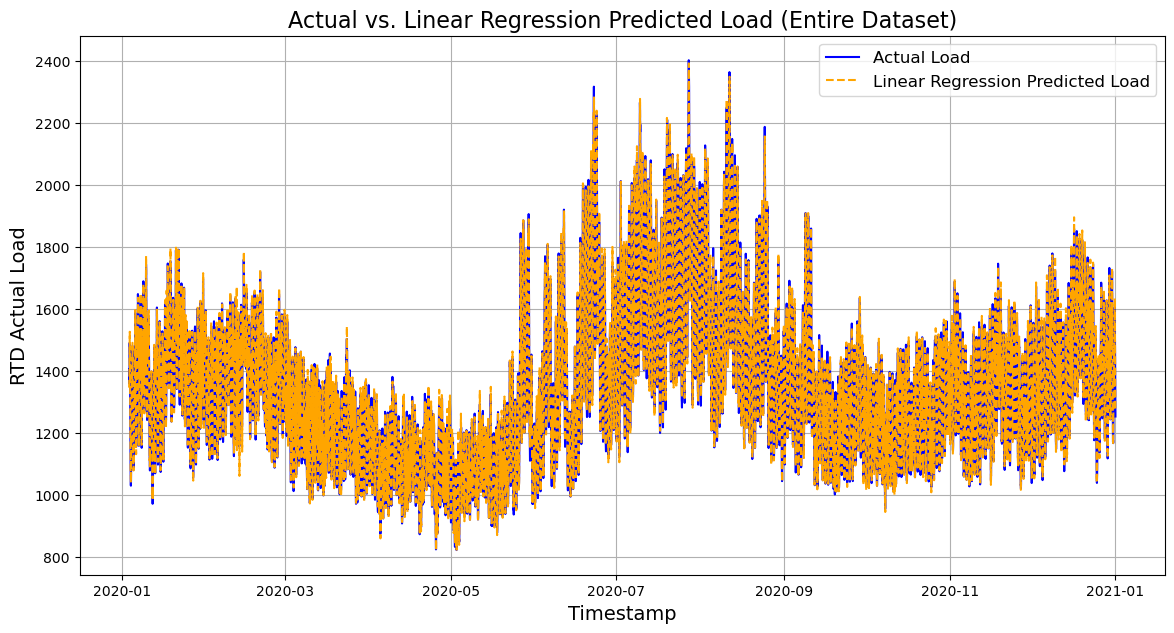

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataset (ensure 'RTD Actual Load' exists in your data)
# Replace 'your_data.csv' with your actual file
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='Timestamp')
# print(data.shape())

# Step 1: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['RTD Actual Load']])

# Step 2: Create features and labels for supervised learning
def create_features_labels(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps].flatten())  # Flatten the sequence
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the sequence length
time_steps = 60  # Use the last 60 time steps to predict the next step

# Create features and labels
X, y = create_features_labels(scaled_data, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
# Step 3: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Full predictions for the entire dataset
full_predictions = model.predict(X)
full_predictions = scaler.inverse_transform(full_predictions.reshape(-1, 1))
y = scaler.inverse_transform(y.reshape(-1, 1))
end_time = time.time()
# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")

# Step 6: Plot actual vs predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_steps:], y, label='Actual Load', color='blue')
plt.plot(data.index[time_steps:], full_predictions, label='Linear Regression Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. Linear Regression Predicted Load (Entire Dataset)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


Mean Absolute Error (MAE): 21.45
Mean Squared Error (MSE): 830.39
Root Mean Squared Error (RMSE): 28.82
R² Score: 0.99
Mean Absolute Percentage Error (MAPE): 1.59%
Computation Time: 27.20 seconds


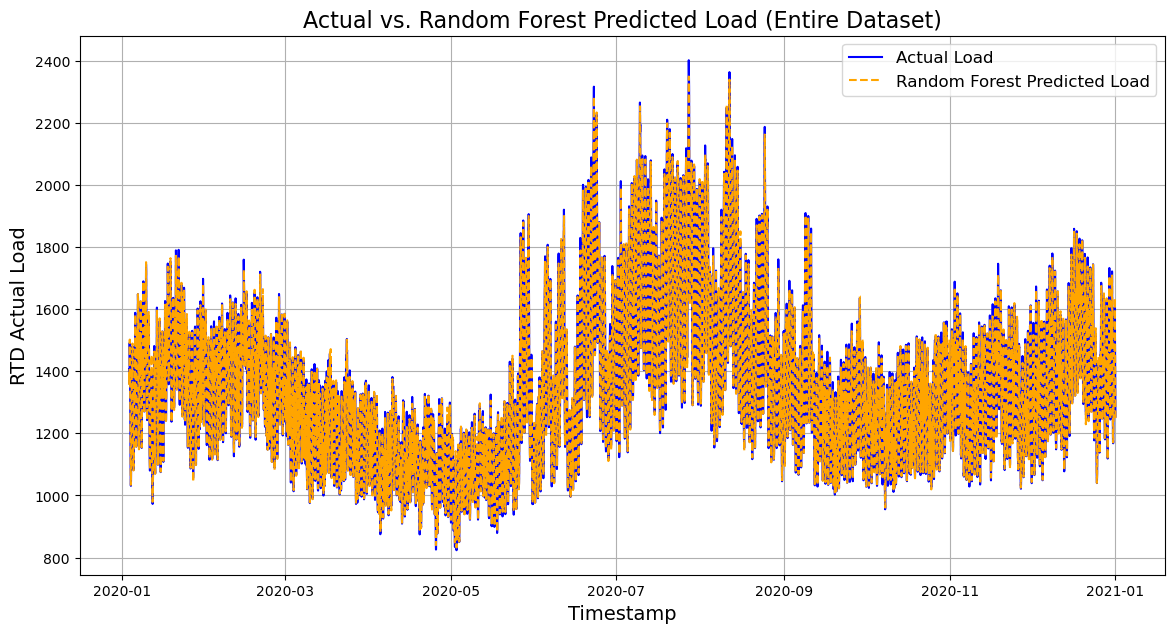

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset (ensure 'RTD Actual Load' exists in your data)
# Replace 'your_data.csv' with your actual file
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='Timestamp')
# print(data.shape())

# Step 1: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['RTD Actual Load']])

# Step 2: Create features and labels for supervised learning
def create_features_labels(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps].flatten())  # Flatten the sequence
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the sequence length
time_steps = 60  # Use the last 60 time steps to predict the next step

# Create features and labels
X, y = create_features_labels(scaled_data, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
# Step 3: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())

# Step 4: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Full predictions for the entire dataset
full_predictions = model.predict(X)
full_predictions = scaler.inverse_transform(full_predictions.reshape(-1, 1))
y = scaler.inverse_transform(y.reshape(-1, 1))
end_time = time.time()
# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")
# Step 6: Plot actual vs predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_steps:], y, label='Actual Load', color='blue')
plt.plot(data.index[time_steps:], full_predictions, label='Random Forest Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. Random Forest Predicted Load (Entire Dataset)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


Mean Absolute Error (MAE): 23.91
Mean Squared Error (MSE): 980.52
Root Mean Squared Error (RMSE): 31.31
R² Score: 0.98
Mean Absolute Percentage Error (MAPE): 1.78%
Computation Time: 12.30 seconds


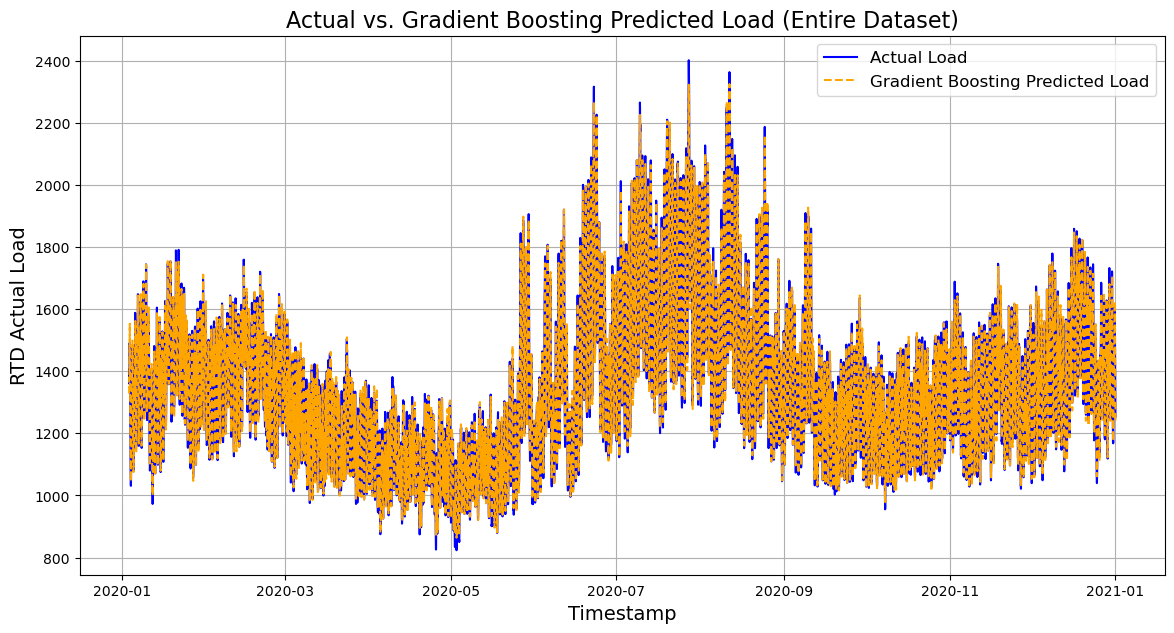

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Load your dataset (ensure 'RTD Actual Load' exists in your data)
# Replace 'your_data.csv' with your actual file
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='Timestamp')
# print(data.shape())

# Step 1: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['RTD Actual Load']])

# Step 2: Create features and labels for supervised learning
def create_features_labels(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps].flatten())  # Flatten the sequence
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the sequence length
time_steps = 60  # Use the last 60 time steps to predict the next step

# Create features and labels
X, y = create_features_labels(scaled_data, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
# Step 3: Train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train.ravel())

# Step 4: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Full predictions for the entire dataset
full_predictions = model.predict(X)
full_predictions = scaler.inverse_transform(full_predictions.reshape(-1, 1))
y = scaler.inverse_transform(y.reshape(-1, 1))
end_time = time.time()
# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Computation Time: {end_time - start_time:.2f} seconds")
# Step 6: Plot actual vs predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_steps:], y, label='Actual Load', color='blue')
plt.plot(data.index[time_steps:], full_predictions, label='Gradient Boosting Predicted Load', linestyle='--', color='orange')
plt.title('Actual vs. Gradient Boosting Predicted Load (Entire Dataset)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('RTD Actual Load', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()
